# Import libraries 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Reading CSV file

In [2]:
movie = pd.read_csv("my_movies.csv")
movie.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [4]:
movie.shape

(10, 15)

In [5]:
movie = movie.iloc[: , 5:]

In [6]:
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori Algorithm 

### apriori algorithm with min support = 0.05 and lenghth of the itemsets = 3

In [7]:
frequent_moviesets = apriori(movie, min_support=0.05, max_len= 3,  use_colnames=True)
frequent_moviesets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


#### We got 45 combination of moviesets with support = 0.05 and item lenghth = 3

# Association rules 

#### Creating rules wirth confidence min threshold = 0.5

In [8]:
rules = association_rules(frequent_moviesets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
105,"(Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
106,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
107,(Harry Potter1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
108,(Green Mile),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


#### With confidence threshold value 0.5 we have got 110 rules

In [9]:
rules.sort_values('confidence',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,"(Gladiator, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
58,"(Harry Potter1, LOTR2)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
39,(LOTR),"(Gladiator, Sixth Sense)",0.1,0.5,0.1,1.0,2.000000,0.05,inf
40,"(Gladiator, Green Mile)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
92,"(LOTR1, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
43,"(LOTR1, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
44,"(LOTR1, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
45,"(Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
88,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
49,"(LOTR1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf


In [10]:
rules[rules.confidence>0.9].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
8,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
10,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
11,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
12,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
16,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
17,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
22,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
26,(Braveheart),(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf
29,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf


Text(0.5, 1.0, 'Most populer movies')

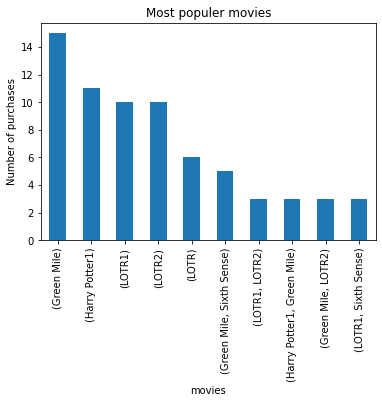

In [11]:
fig, ax=plt.subplots(figsize=(6,4))
rules['antecedents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of purchases')
plt.xlabel('movies')
plt.title('Most populer movies')

Text(0.5, 1.0, 'Most populer movies')

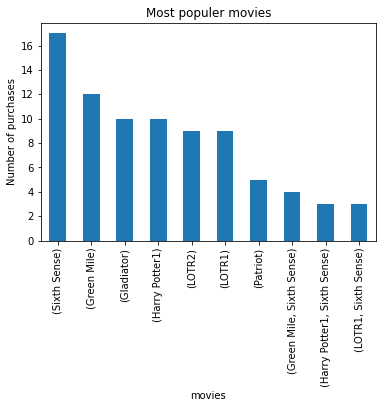

In [12]:
fig, ax=plt.subplots(figsize=(6,4))
rules['consequents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of purchases')
plt.xlabel('movies')
plt.title('Most populer movies')

## From the above graph it is clear that Sixth sense movie is most populer one

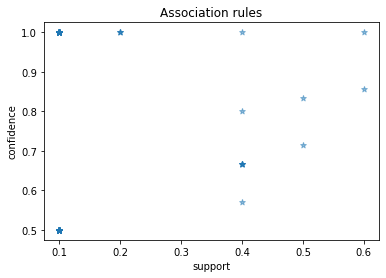

In [13]:
plt.scatter(rules.support, rules.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.title('Association rules')
plt.show()

### Apriori algorithm with min support = 0.1 and lenghth of the itemsets = 2

In [14]:
frequent_moviesets_1 = apriori(movie, min_support=0.1, max_len= 2,  use_colnames=True)
frequent_moviesets_1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


#### We got 29 combination of moviesets with support = 0.1 and item lenghth = 2

# Association rules 

#### Creating rules wirth confidence min threshold = 0.8

In [15]:
rules_1 = association_rules(frequent_moviesets_1, metric="confidence", min_threshold=0.7)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


#### with confidence threshold value 0.7 we have got 12 rules

Text(0.5, 1.0, 'Most populer movies')

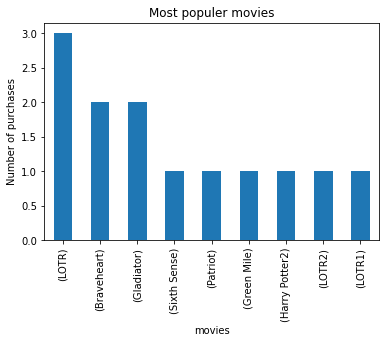

In [16]:
fig, ax=plt.subplots(figsize=(6,4))
rules_1['antecedents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of purchases')
plt.xlabel('movies')
plt.title('Most populer movies')

Text(0.5, 1.0, 'Most populer movies')

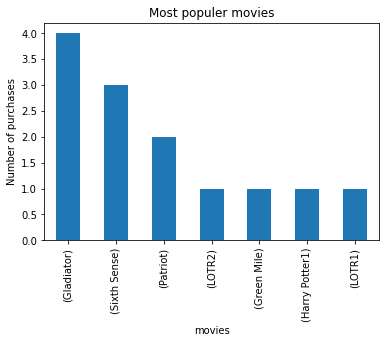

In [17]:
fig, ax=plt.subplots(figsize=(6,4))
rules_1['consequents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of purchases')
plt.xlabel('movies')
plt.title('Most populer movies')

## From the above graph it is clear that Gladiator movie is most populer one for
## threshold value = 0.7

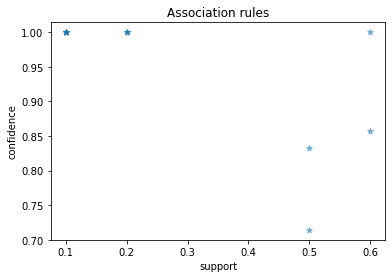

In [18]:
plt.scatter(rules_1.support, rules_1.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.title('Association rules')
plt.show()